In [1]:
import logging
logging.basicConfig(level=logging.WARN)
import matplotlib.pyplot as plt

from profilebuilder import *

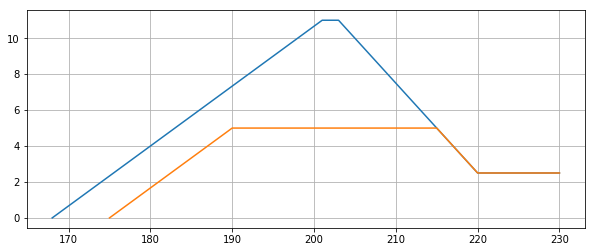

In [2]:
%matplotlib inline

fig, ax = plt.subplots(figsize=(10,4))

p = Profile()
p.append(slope='1:3', z1=0., z2=11.)
p.append(slope=0, dx=2)
p.append(slope='-1:2', z2=2.5, x2=220.)
p.append(slope=0, dx=10)
p.plot(ax=ax)

p = Profile()
p.append(slope='1:3', z1=0., z2=5.)
p.append(slope=0, dx=25)
p.append(slope='-1:2', z2=2.5, x2=220.)
p.append(slope=0, dx=10)
p.plot(ax=ax)

ax.grid()


In [3]:
p.to_json()

'[{"z1":0.0,"z2":5.0,"slope":"1:3"},{"dx":25,"slope":0},{"x2":220.0,"z2":2.5,"slope":"-1:2"},{"dx":10,"slope":0}]'

In [4]:
p.get_geometry()

(array([ 175.,  190.,  215.,  220.,  230.]),
 array([ 0. ,  5. ,  5. ,  2.5,  2.5]))

(<matplotlib.figure.Figure at 0x108080da0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1080afcc0>)

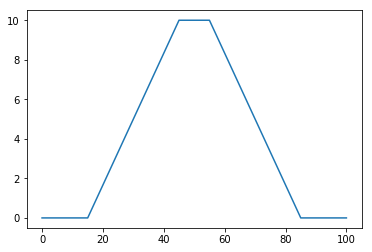

In [5]:
p = templates.DikeProfile()
p.plot()

(<matplotlib.figure.Figure at 0x1083b02b0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x108336630>)

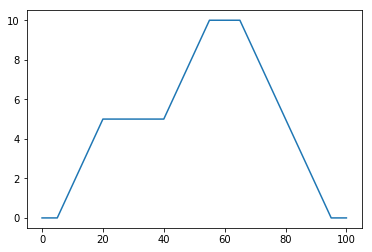

In [6]:
p = templates.DikeWithBermProfile(berm_width=20)
p.plot()

0
1
2
3
[168.0, 201.0, 203.0, 220.0, 230.0]
[0.0, 11.0, 11.0, 2.5, 2.5]
[32.999999999999993, 2, 17.0, 10]
[11.0, 0.0, -8.5, 0.0]


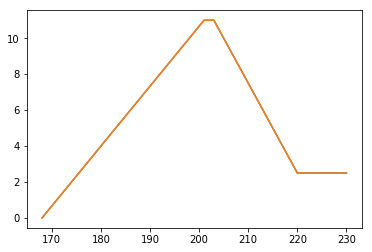

In [7]:
p = Profile()
p.append(slope='1:3', z1=0., z2=11.)
p.append(slope=0, dx=2)
p.append(slope='-1:2', z2=2.5, x2=220.)
p.append(slope=0, dx=10)
fig, ax = p.plot()

n = len(p.segments)
x = [None] * (n+1)
z = [None] * (n+1)
dx = [None] * n
dz = [None] * n

# collect known positions
for i, segment in enumerate(p.segments):
    if segment.x1 is not None:
        if x[i] is None:
            x[i] = segment.x1
        elif x[i] != segment.x1:
            raise ValueError('Geometry overdetermined in x-direction: '
                             '%0.2f and %0.2f.' % (x[i], segment.x1))
    if segment.x2 is not None:
        if x[i+1] is None:
            x[i+1] = segment.x2
        elif x[i+1] != segment.x2:
            raise ValueError('Geometry overdetermined in x-direction: '
                             '%0.2f and %0.2f.' % (x[i+1], segment.x2))
    if segment.z1 is not None:
        if z[i] is None:
            z[i] = segment.z1
        elif z[i] != segment.z1:
            raise ValueError('Geometry overdetermined in z-direction: '
                             '%0.2f and %0.2f.' % (z[i], segment.z1))
    if segment.z2 is not None:
        if z[i+1] is None:
            z[i+1] = segment.z2
        elif z[i+1] != segment.z2:
            raise ValueError('Geometry overdetermined in x-direction: '
                             '%0.2f and %0.2f.' % (z[i+1], segment.z2))
            
    dx[i], dz[i] = segment.get_geometry()

# assume origin if underdetermined
if all([xi is None for xi in x]):
    x[0] = 0.
if all([zi is None for zi in z]):
    z[0] = 0.

# forward sweep
for i in range(n):
    print(i)
    if x[i+1] is None and x[i] is not None and dx[i] is not None:
        x[i+1] = x[i] + dx[i]
    if z[i+1] is None and z[i] is not None and dz[i] is not None:
        z[i+1] = z[i] + dz[i]
    if i < n-2 and (dx[i+1] is None or dz[i+1] is None):
        geom = p.segments[i+1].get_geometry(x1=x[i+1], z1=z[i+1])
        if dx[i+1] is None:
            dx[i+1] = geom[0]
        if dz[i+1] is None:
            dz[i+1] = geom[1]

# backward sweep
for i in range(n-1, -1, -1):
    if x[i-1] is None and x[i] is not None and dx[i-1] is not None:
        x[i-1] = x[i] - dx[i-1]
    if z[i-1] is None and z[i] is not None and dz[i-1] is not None:
        z[i-1] = z[i] - dz[i-1]
        
if any([xi is None for xi in x]) or any([zi is None for zi in z]):
    raise ValueError('Geometry underdetermined.')
    
print(x)
print(z)
print(dx)
print(dz)

ax.plot(x, z)